# K Nearest Neighbours

Telecomms provider using its segmented customer base (categorized into 4 groups) to predict group membership, so that the company can customize offers for individual prospective customers

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

Load Data from a CSV file

In [4]:
df = pd.read_csv('C:/Users/Thebe/Documents/Thb/Data Science/Data Science Projects/KNN/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
df.size

12000

# Data Visualization & Analysis

In [6]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C2FFDF33C8>]],
      dtype=object)

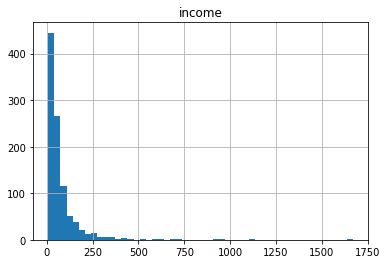

In [7]:
df.hist('income', bins=50)

# Feature Set

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn, convert Pandas Df to Numpy Array

In [10]:
X = df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

# Labels

In [12]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

# Data Normalization

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set: ', X_trainset.shape, y_trainset.shape)
print('Test Set: ', X_testset.shape, y_testset.shape)

Train set:  (800, 11) (800,)
Test Set:  (200, 11) (200,)


# Classification: K Nearest Neighbors (KNN)

Import the library

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Training

Starting with k=4

In [18]:
k=4
neigh=KNeighborsClassifier(n_neighbors=k).fit(X_trainset, y_trainset)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

# Predicting

In [20]:
yhat=neigh.predict(X_testset)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

# Accuracy Evaluation

In [21]:
from sklearn import metrics
print('Train set Accuracy is: ', metrics.accuracy_score(y_trainset, neigh.predict(X_trainset)))
print('Test set Accuracy is: ', metrics.accuracy_score(y_testset, yhat))

Train set Accuracy is:  0.5475
Test set Accuracy is:  0.32


When k=5

Training

In [22]:
k=5
neigh1=KNeighborsClassifier(n_neighbors=k).fit(X_trainset,y_trainset)
neigh1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Prediction

In [24]:
yhat1=neigh1.predict(X_testset)
yhat1[0:5]

array([1, 3, 3, 4, 4], dtype=int64)

Accuracy

In [26]:
print('Train set accucary: ', metrics.accuracy_score(y_trainset,neigh1.predict(X_trainset)))
print('Test set accuracy: ', metrics.accuracy_score(y_testset, yhat1))

Train set accucary:  0.5375
Test set accuracy:  0.315


Loop to find more values of k

In [35]:
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ,
       0.33 , 0.315, 0.34 , 0.33 , 0.315, 0.34 ])

# Plot model accuracy for Different number of Neighbors

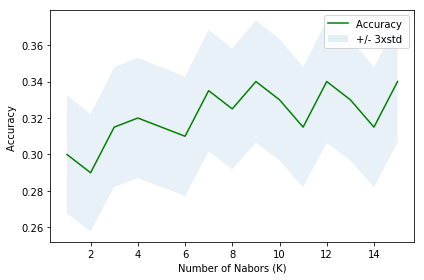

In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [37]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
